 # Data Exploration 

In this file we take the data that was cleaned and processed from raw and begin to look at distributions and interactions as well as transform some features.

## Step 1 
>We begin by importing necesaary packages, loading the data, and confirming that all data has loaded properly.

In [1]:
#Code for importing packages
import pandas as pd 
import numpy as np  
from pandas_profiling import ProfileReport 
import warnings
warnings.filterwarnings("ignore") 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('seaborn')
sns.set(style='darkgrid', color_codes=True)

In [2]:
#Loadies data, drops unneeded columns, and sets our target column 
data = pd.read_csv('processed_data.csv')   
del data['Unnamed: 0'] 
del data['job']
target = data['job_catagories']

In [3]:
#Checks first five rows of dataframe
data.head()

,age,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,location,offspring,pets,religion,sign,smokes,job_catagories,above_average_height
0,22,male,heterosexual,body_curvy/full_figured,diet_anything,drinks,no_drugs,no_college_degree,asian,75.0,san_francisco_ca,no_kids,likes_dogs_and_cats,agnosticism,gemini,smokes,public_services,above_average_height
1,35,male,heterosexual,body_average,diet_other,drinks,drugs,unknown_education,white,70.0,not_san_francisco,no_kids,likes_dogs_and_cats,agnosticism,cancer,does_not_smoke,public_services,above_average_height
2,29,male,heterosexual,body_fit/athletic,diet_anything,drinks,no_drugs,college_graduate_or_higher,asian,66.0,san_francisco_ca,unknown_if_kids,likes_dogs_and_cats,religion_other/unknown,aquarius,does_not_smoke,entertainment/artist/craftmans,above_average_height
3,29,male,heterosexual,body_average,diet_anything,drinks,unknown_if_drugs,college_graduate_or_higher,white,67.0,san_francisco_ca,no_kids,likes_cats,atheism,taurus,does_not_smoke,science/tech,above_average_height
4,31,female,heterosexual,body_average,diet_anything,drinks,no_drugs,college_graduate_or_higher,white,65.0,san_francisco_ca,no_kids,likes_dogs_and_cats,christianity,sagittarius,does_not_smoke,entertainment/artist/craftmans,above_average_height


In [4]:
#Check all the column titles in the dataframe
data.keys()

Index(['age', 'sex', 'orientation', 'body_type', 'diet', 'drinks', 'drugs',
       'education', 'ethnicity', 'height', 'location', 'offspring', 'pets',
       'religion', 'sign', 'smokes', 'job_catagories', 'above_average_height'],
      dtype='object')

In [5]:
#Confirms length of dataframe
len(data)

32144

## Step 2 Visualization of the Data   
>Now that we know our data las been set up properly we can being to use visualizations to see if anything jumps out at us. This coud be insights to look into, things that needed to be corrected, or  just interesting things to note in our presentation.

In [6]:
#Here we use the profile report package to run an intial report of our data with visuals included
data_profile = ProfileReport(data, title = 'OKC Profile Data')
data_profile

Summarize dataset:   0%|          | 0/31 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

>Based on the above report I know I would like to the distribution graphs side by side 


In [7]:
#Based on the above report I know I would like to the distribution graphs side by side 
 
numerical = ['age', 'height']

categorical = ['sex', 'orientation', 'body_type', 'diet', 'drinks', 'drugs','education'
               , 'ethnicity','location', 'offspring', 'pets','religion', 'sign', 
               'smokes', 'above_average_height']

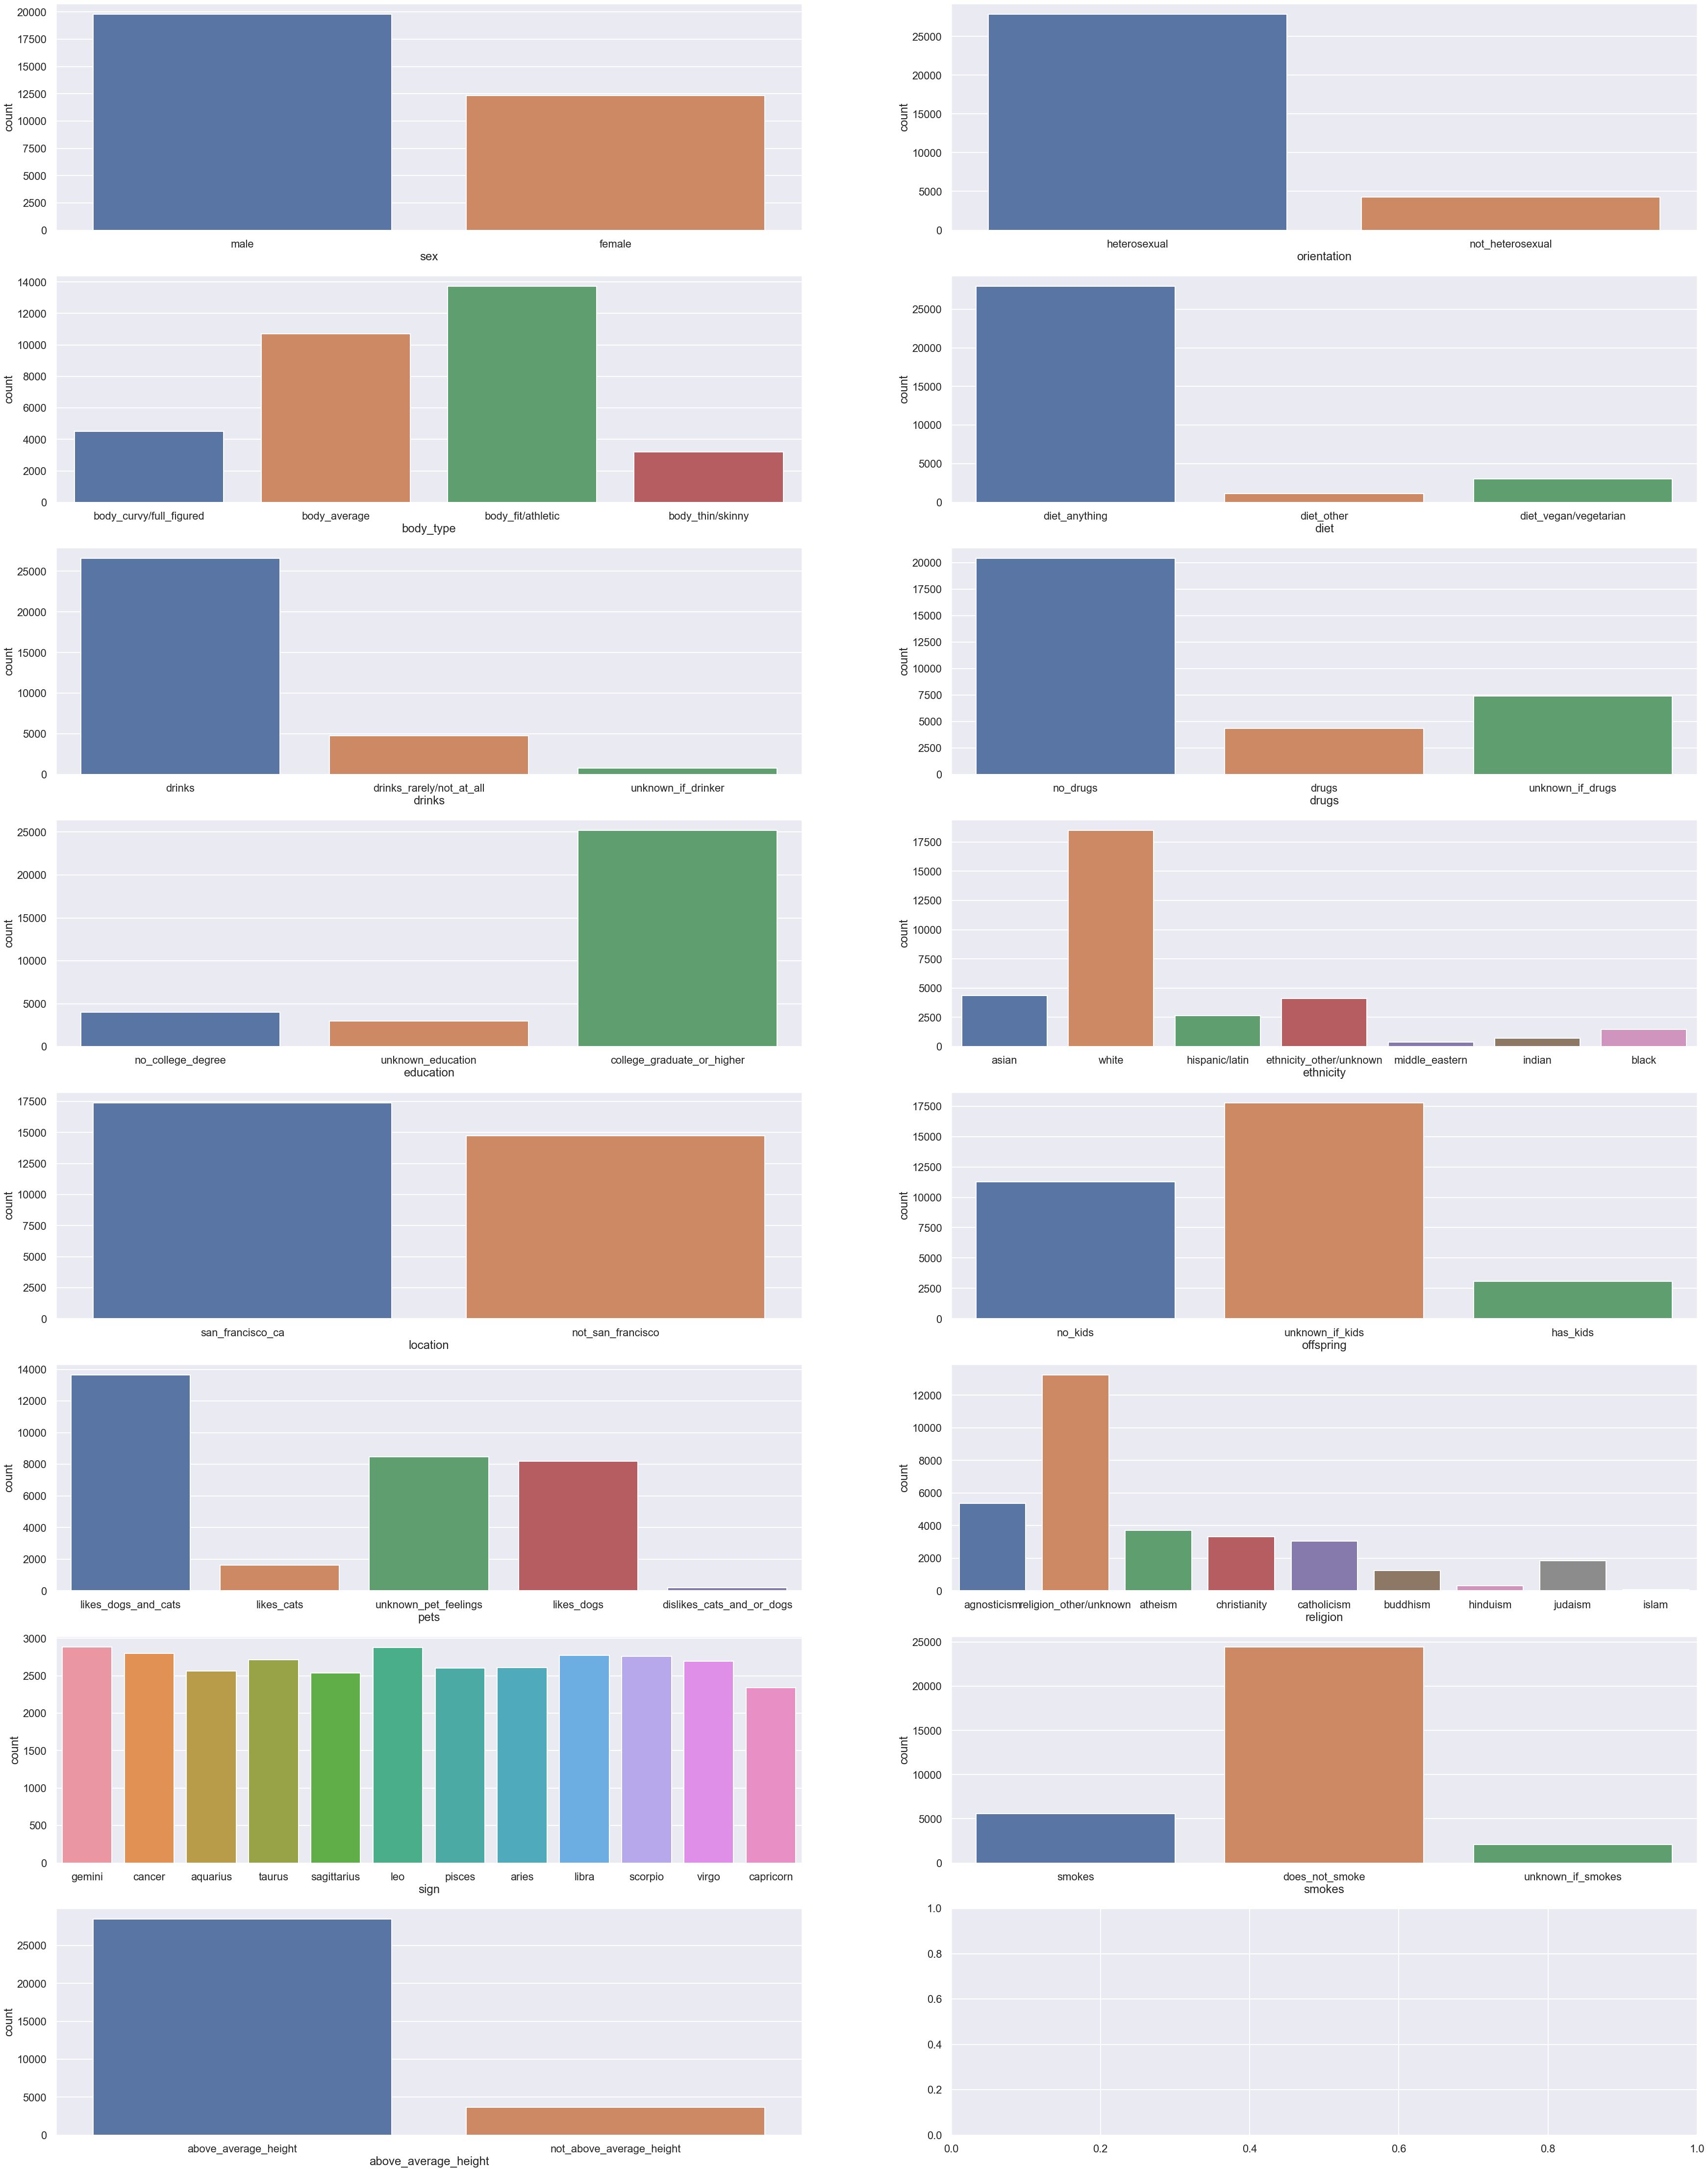

In [8]:
#Generates charts for all the catagorical columns
sns.set_context("poster")
fig, ax = plt.subplots(8, 2, figsize=(60, 80))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(data[variable], ax=subplot)
#     for label in subplot.get_xticklabels():
#         label.set_rotation(90)

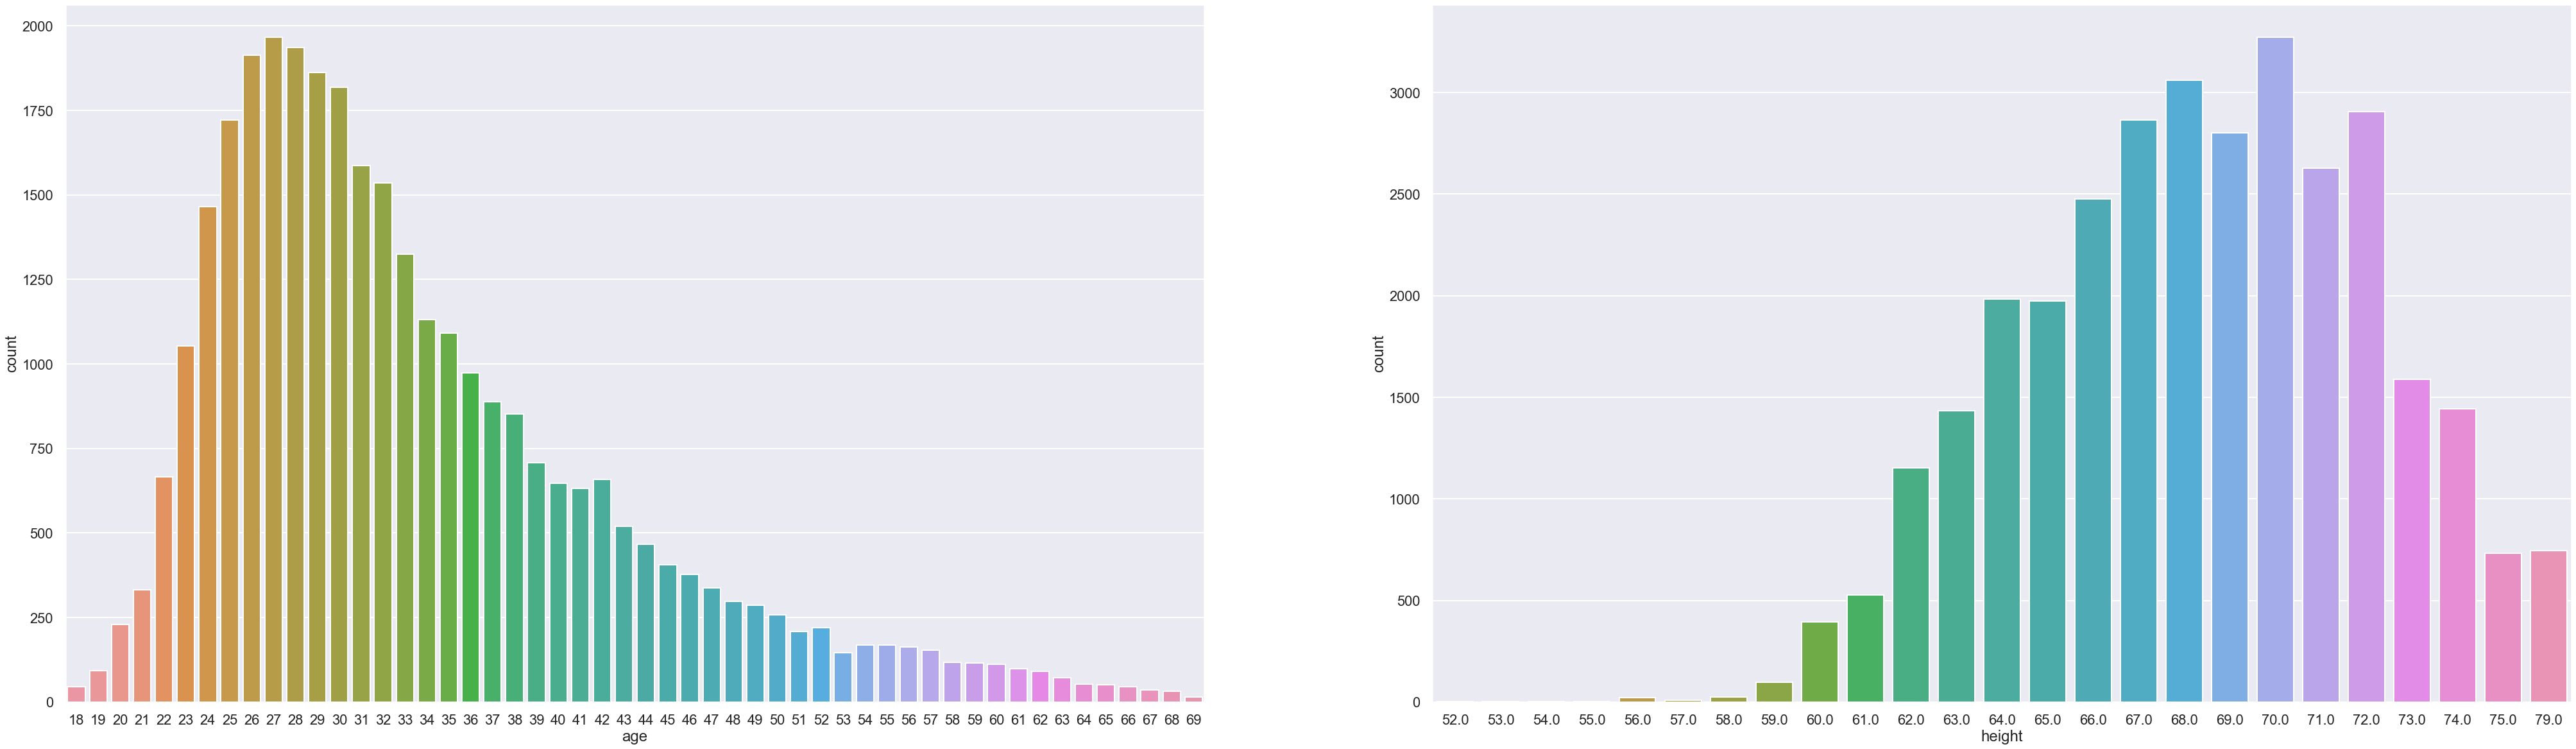

In [9]:
#Generates charts for all the numerical columns
sns.set_context("poster")
fig, ax = plt.subplots(1, 2, figsize=(70, 20))
for variable, subplot in zip(numerical, ax.flatten()):
    sns.countplot(data[variable], ax=subplot)

<AxesSubplot:xlabel='Count', ylabel='job_catagories'>

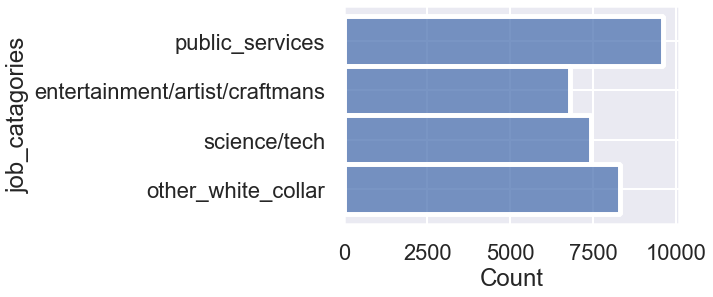

In [10]:
#Plots our target column
sns.histplot(data, y="job_catagories")


>Havings looked at our distributions we know that in some categories we have heavy inbalance which should be noted when interpreting our results. 

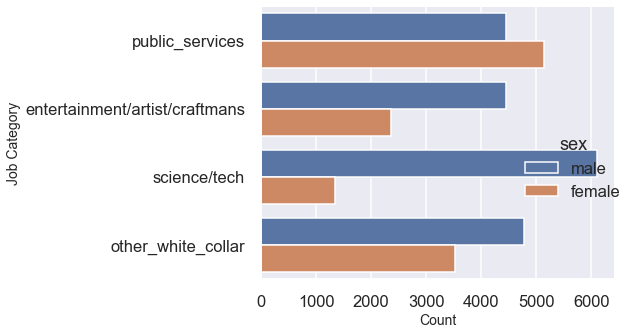

In [11]:
sns.set_context("talk")
sns.catplot( y='job_catagories', kind="count",  hue="sex", aspect=1.5, data=data)
plt.xlabel("Count", size=14)
plt.ylabel("Job Category", size=14)
plt.tight_layout()

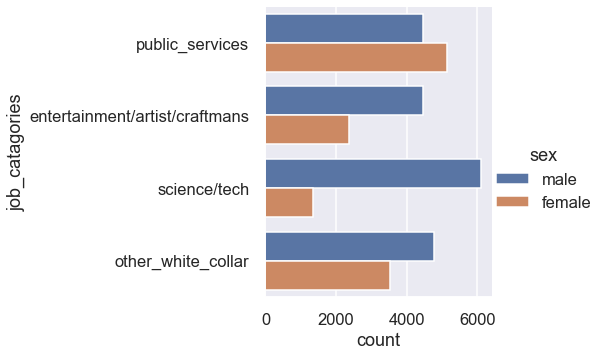

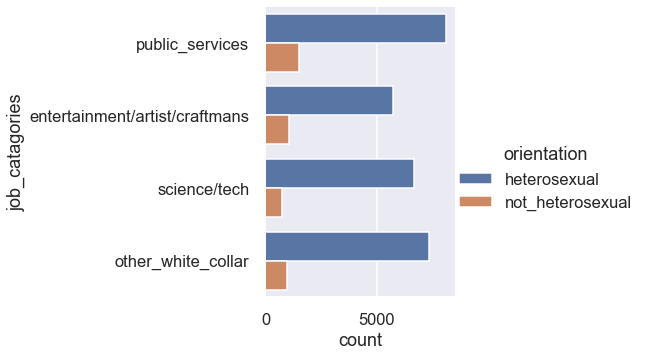

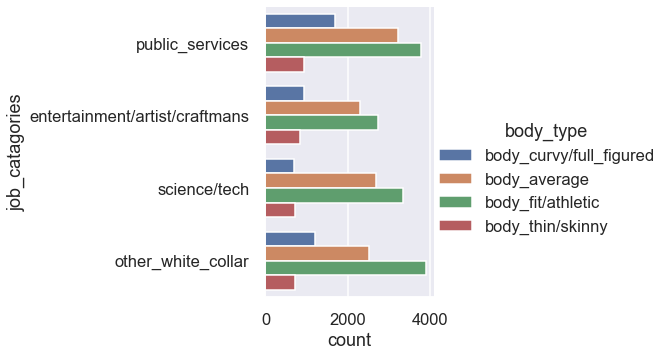

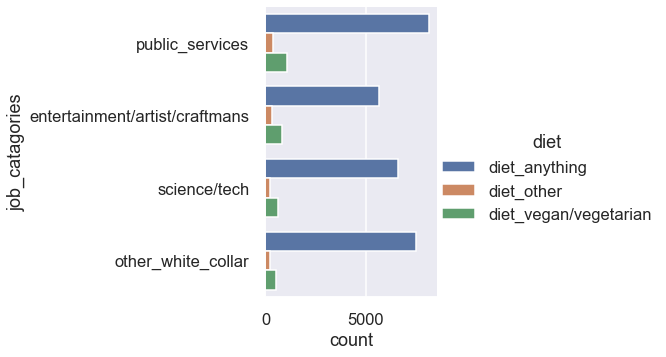

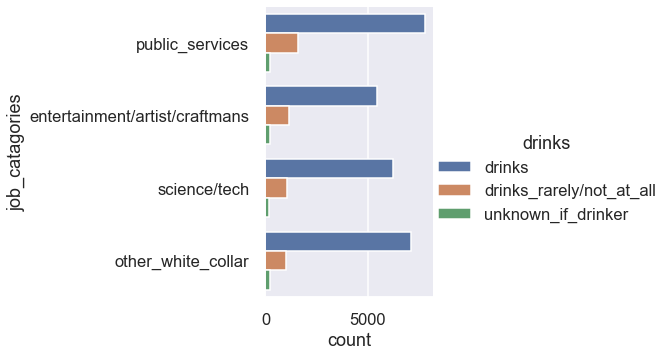

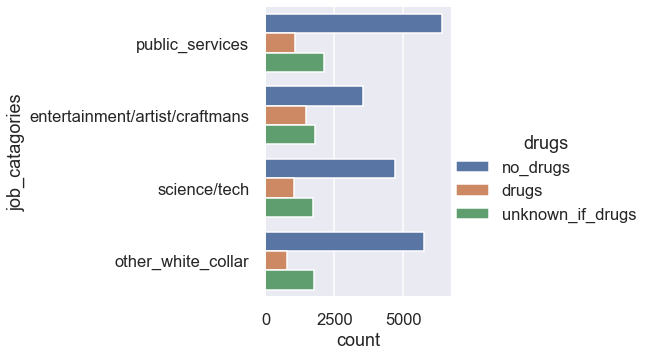

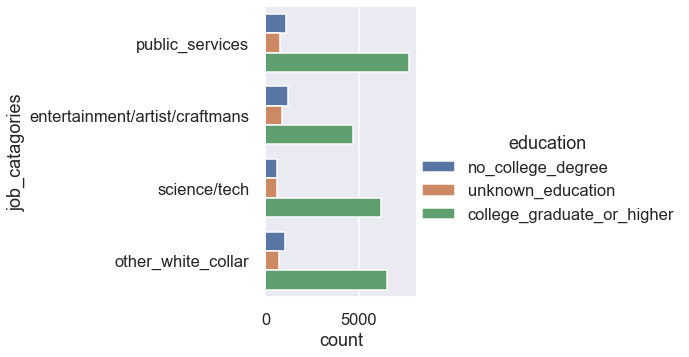

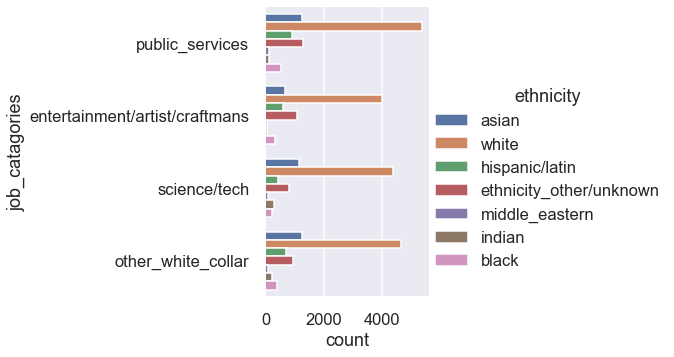

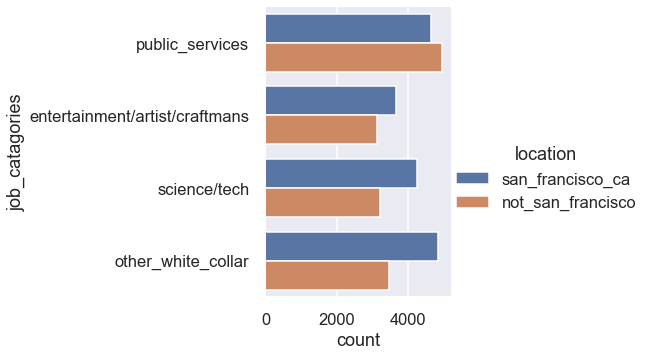

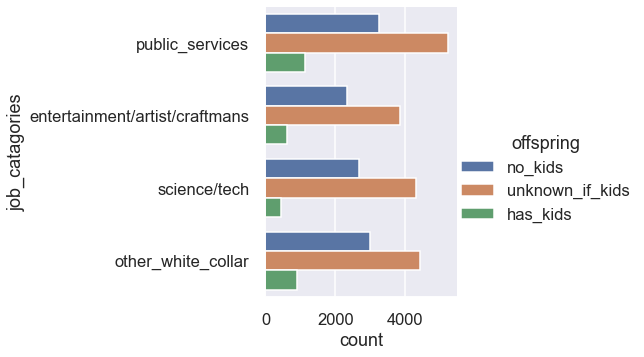

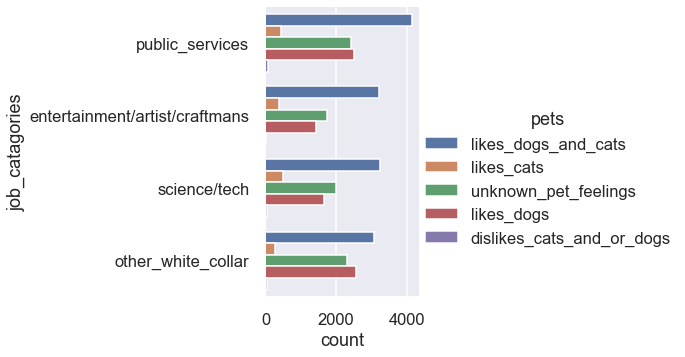

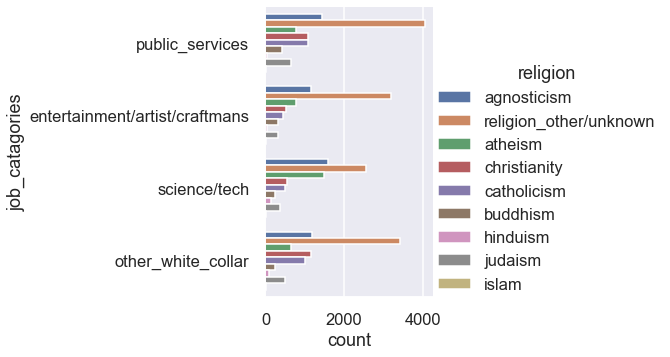

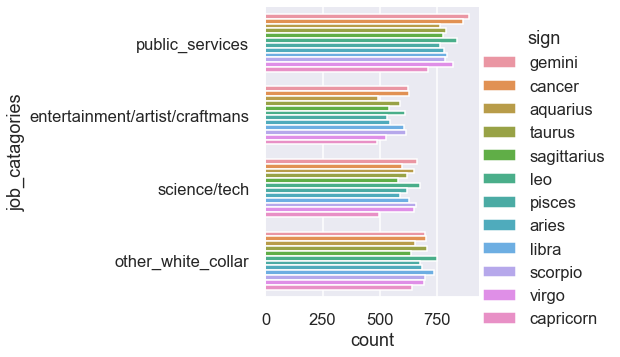

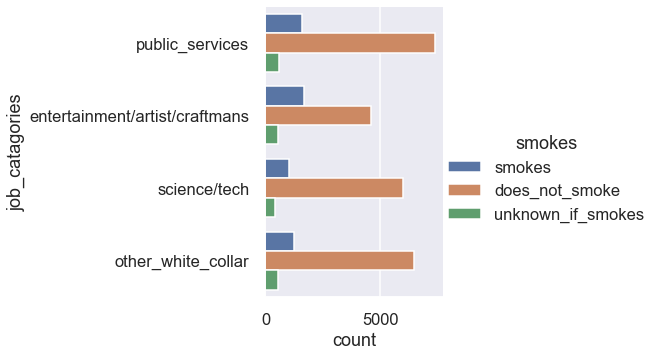

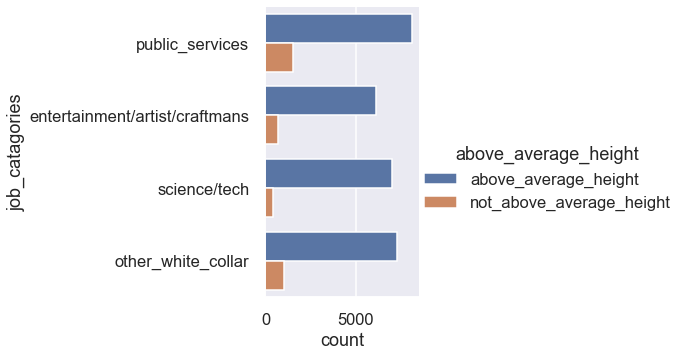

In [12]:
#This function creates the same histograms as above but group by job category 
def group_graph(data):
    #fig, ax = plt.subplots(8, 2, figsize=(60, 80))
    for feat in data[categorical]:    
        sns.catplot( y='job_catagories', kind="count",  hue=feat, aspect=1.5, data=data, ax=subplot) 
group_graph(data)

<AxesSubplot:xlabel='age', ylabel='job_catagories'>

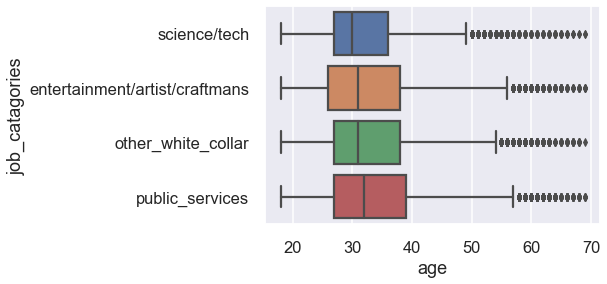

In [13]:
#This creates a boxblot for age against job categories
sorted_nb = data.groupby(['job_catagories'])['age'].median().sort_values()
sns.boxplot(y=data['job_catagories'], x=data['age'], order=list(sorted_nb.index))

<AxesSubplot:xlabel='height', ylabel='job_catagories'>

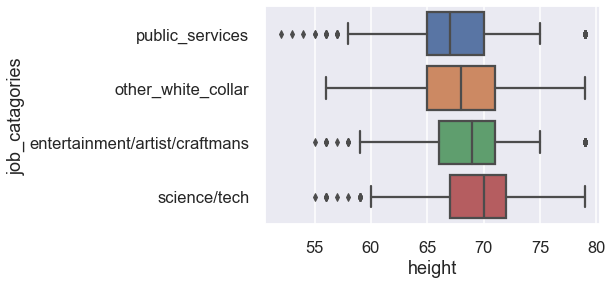

In [14]:
#This creates a boxblot for height against job categories
sorted_nb = data.groupby(['job_catagories'])['height'].median().sort_values()
sns.boxplot(y=data['job_catagories'], x=data['height'], order=list(sorted_nb.index))

Having looked at the data in all of the various ways above, it seems my models would be likely well served by creating a few dummy categories. However, because most of my data is categorical, I wonder if would make sense to turn all my categorical data into dummies or only the ones where the distribution is fairly even. With this in mind I will create 4 different data files to reflect my four lines of thinking: one where i create no dummies, one where I turn them all into dummies, one I only turn the categories with even distribution into dummies, and one where I only 

## Step 3:  Creating Dummy Categories and CSV Files  
>The next few steps will cover creating the dummy variables and the creating csv files for them.

In [15]:
#Sets the current data sets as is to a new csv file
data.to_csv('data_no_dummies.csv')

In [16]:
#Creates a copy for the dataset to work with
df1 = data.copy()

In [17]:
# This function will turn a list of features into dummy categories
def create_dummies(df,list_of_variables):
    for v in list_of_variables: 
        new_df = pd.concat([df, pd.get_dummies(df[v])], 1) 
        new_df = new_df.drop(columns = v)  
        continue
    return new_df

In [18]:
data.keys()

Index(['age', 'sex', 'orientation', 'body_type', 'diet', 'drinks', 'drugs',
       'education', 'ethnicity', 'height', 'location', 'offspring', 'pets',
       'religion', 'sign', 'smokes', 'job_catagories', 'above_average_height'],
      dtype='object')

In [19]:
#Applying the dummy catagories function to even distributed variables list 

dum1 = pd.get_dummies(df1['location'])
df2 = pd.concat([df1, dum1], axis=1)  
df2 = df2.drop(columns = 'location') 

dum2 = pd.get_dummies(df2['sign'])
df2 = pd.concat([df2, dum2], axis=1)  
df2 = df2.drop(columns = 'sign')

In [20]:
df2.head()

,age,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,...,cancer,capricorn,gemini,leo,libra,pisces,sagittarius,scorpio,taurus,virgo
0,22,male,heterosexual,body_curvy/full_figured,diet_anything,drinks,no_drugs,no_college_degree,asian,75.0,...,0,0,1,0,0,0,0,0,0,0
1,35,male,heterosexual,body_average,diet_other,drinks,drugs,unknown_education,white,70.0,...,1,0,0,0,0,0,0,0,0,0
2,29,male,heterosexual,body_fit/athletic,diet_anything,drinks,no_drugs,college_graduate_or_higher,asian,66.0,...,0,0,0,0,0,0,0,0,0,0
3,29,male,heterosexual,body_average,diet_anything,drinks,unknown_if_drugs,college_graduate_or_higher,white,67.0,...,0,0,0,0,0,0,0,0,1,0
4,31,female,heterosexual,body_average,diet_anything,drinks,no_drugs,college_graduate_or_higher,white,65.0,...,0,0,0,0,0,0,1,0,0,0


In [21]:
df2.to_csv('data_even_dummies.csv')

In [22]:
#Applying the dummy catagories function to uneven distributed variables list 

dum1 = pd.get_dummies(df1['sex'])
df3 = pd.concat([df1, dum1], axis=1)  
df3 = df3.drop(columns = 'sex') 

dum2 = pd.get_dummies(df3['orientation'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'orientation') 

dum2 = pd.get_dummies(df3['body_type'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'body_type') 

dum2 = pd.get_dummies(df3['diet'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'diet') 

dum2 = pd.get_dummies(df3['drinks'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'drinks') 

dum2 = pd.get_dummies(df3['drugs'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'drugs')

dum2 = pd.get_dummies(df3['education'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'education') 

dum2 = pd.get_dummies(df3['ethnicity'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'ethnicity') 

dum2 = pd.get_dummies(df3['offspring'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'offspring') 

dum2 = pd.get_dummies(df3['pets'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'pets') 

dum2 = pd.get_dummies(df3['religion'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'religion')

dum2 = pd.get_dummies(df3['smokes'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'smokes') 

dum2 = pd.get_dummies(df3['above_average_height'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'above_average_height') 


In [23]:
df3.keys()

Index(['age', 'height', 'location', 'sign', 'job_catagories', 'female', 'male',
       'heterosexual', 'not_heterosexual', 'body_average',
       'body_curvy/full_figured', 'body_fit/athletic', 'body_thin/skinny',
       'diet_anything', 'diet_other', 'diet_vegan/vegetarian',
       'drinks_rarely/not_at_all', 'unknown_if_drinker', 'no_drugs',
       'unknown_if_drugs', 'college_graduate_or_higher', 'no_college_degree',
       'unknown_education', 'asian', 'black', 'ethnicity_other/unknown',
       'hispanic/latin', 'indian', 'middle_eastern', 'white', 'has_kids',
       'no_kids', 'unknown_if_kids', 'dislikes_cats_and_or_dogs', 'likes_cats',
       'likes_dogs', 'likes_dogs_and_cats', 'unknown_pet_feelings',
       'agnosticism', 'atheism', 'buddhism', 'catholicism', 'christianity',
       'hinduism', 'islam', 'judaism', 'religion_other/unknown',
       'does_not_smoke', 'unknown_if_smokes', 'not_above_average_height'],
      dtype='object')

In [24]:
df3.to_csv('data_not_even_dummies.csv')

In [25]:
#Applying the dummy catagories function to uneven distributed variables list 

dum1 = pd.get_dummies(df1['sex'])
df3 = pd.concat([df1, dum1], axis=1)  
df3 = df3.drop(columns = 'sex') 

dum2 = pd.get_dummies(df3['orientation'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'orientation') 

dum2 = pd.get_dummies(df3['body_type'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'body_type') 

dum2 = pd.get_dummies(df3['diet'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'diet') 

dum2 = pd.get_dummies(df3['drinks'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'drinks') 

dum2 = pd.get_dummies(df3['drugs'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'drugs')

dum2 = pd.get_dummies(df3['education'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'education') 

dum2 = pd.get_dummies(df3['ethnicity'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'ethnicity') 

dum2 = pd.get_dummies(df3['offspring'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'offspring') 

dum2 = pd.get_dummies(df3['pets'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'pets') 

dum2 = pd.get_dummies(df3['religion'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'religion')

dum2 = pd.get_dummies(df3['smokes'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'smokes') 

dum2 = pd.get_dummies(df3['above_average_height'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'above_average_height')  

dum2 = pd.get_dummies(df3['location'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'location') 

dum2 = pd.get_dummies(df3['sign'])
df3 = pd.concat([df3, dum2], axis=1)  
df3 = df3.drop(columns = 'sign') 

In [26]:
df3.keys()

Index(['age', 'height', 'job_catagories', 'female', 'male', 'heterosexual',
       'not_heterosexual', 'body_average', 'body_curvy/full_figured',
       'body_fit/athletic', 'body_thin/skinny', 'diet_anything', 'diet_other',
       'diet_vegan/vegetarian', 'drinks_rarely/not_at_all',
       'unknown_if_drinker', 'no_drugs', 'unknown_if_drugs',
       'college_graduate_or_higher', 'no_college_degree', 'unknown_education',
       'asian', 'black', 'ethnicity_other/unknown', 'hispanic/latin', 'indian',
       'middle_eastern', 'white', 'has_kids', 'no_kids', 'unknown_if_kids',
       'dislikes_cats_and_or_dogs', 'likes_cats', 'likes_dogs',
       'likes_dogs_and_cats', 'unknown_pet_feelings', 'agnosticism', 'atheism',
       'buddhism', 'catholicism', 'christianity', 'hinduism', 'islam',
       'judaism', 'religion_other/unknown', 'does_not_smoke',
       'unknown_if_smokes', 'not_above_average_height', 'not_san_francisco',
       'san_francisco_ca', 'aquarius', 'aries', 'cancer', 'capric

In [27]:
df3.to_csv('data_all_dummies.csv')